In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error,mean_squared_error,r2_score,explained_variance_score

In [4]:
pd.options.display.max_columns=None

In [5]:
df=pd.read_csv('C:\\Users\\User\\Downloads\\forestfires (1).csv')

In [6]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [7]:
df=df.drop(['month','day'],axis=1)

In [14]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
df['size_category'].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [12]:
df['size_category']=df['size_category'].replace(('small','large'),(0,1))

In [17]:
scl=MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train=scl.fit_transform(X_train)
X_test=scl.transform(X_test)

In [60]:
X_train.shape

(361, 28)

In [54]:
y_test.shape

(156,)

In [53]:
X_test.shape

(156, 28)

In [23]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [240]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [241]:
#help(Sequential)

In [254]:
model=Sequential()
model.add(Dense(28,activation='relu'))

model.add(Dense(28,activation='relu'))
model.add(Dense(28,activation='relu'))


model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [255]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),callbacks=[early_stop],epochs=100)

Train on 361 samples, validate on 156 samples
Epoch 1/100
361/361 [==============================] - 3s 8ms/sample - loss: 0.7013 - val_loss: 0.6710
Epoch 2/100
361/361 [==============================] - 0s 155us/sample - loss: 0.6420 - val_loss: 0.6393
Epoch 3/100
361/361 [==============================] - 0s 153us/sample - loss: 0.5974 - val_loss: 0.6202
Epoch 4/100
361/361 [==============================] - 0s 172us/sample - loss: 0.5735 - val_loss: 0.6270
Epoch 5/100
361/361 [==============================] - 0s 179us/sample - loss: 0.5624 - val_loss: 0.6315
Epoch 6/100
361/361 [==============================] - 0s 150us/sample - loss: 0.5595 - val_loss: 0.6297
Epoch 7/100
361/361 [==============================] - 0s 168us/sample - loss: 0.5568 - val_loss: 0.6270
Epoch 8/100
361/361 [==============================] - 0s 147us/sample - loss: 0.5541 - val_loss: 0.6251
Epoch 9/100
361/361 [==============================] - 0s 166us/sample - loss: 0.5520 - val_loss: 0.6303
Epoch 10/10

In [256]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()
predictions=model.predict_classes(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

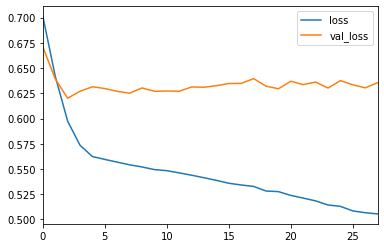

In [257]:
model_loss.plot()

In [258]:
predictions=model.predict_classes(X_test)

In [259]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       107
           1       1.00      0.04      0.08        49

    accuracy                           0.70       156
   macro avg       0.85      0.52      0.45       156
weighted avg       0.79      0.70      0.59       156

[[107   0]
 [ 47   2]]


In [260]:
df1=pd.read_csv('C:\\Users\\User\\Downloads\\concrete.csv')

In [261]:
df1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [264]:
X=df1.drop('strength',axis=1).values
y=df1['strength'].values

In [282]:
X

array([[ 141.3,  212. ,    0. , ...,  971.8,  748.5,   28. ],
       [ 168.9,   42.2,  124.3, ..., 1080.8,  796.2,   14. ],
       [ 250. ,    0. ,   95.7, ...,  956.9,  861.2,   28. ],
       ...,
       [ 276.4,  116. ,   90.3, ...,  870.1,  768.3,   28. ],
       [ 342. ,   38. ,    0. , ...,  932. ,  670. ,  270. ],
       [ 540. ,    0. ,    0. , ..., 1125. ,  613. ,    7. ]])

In [283]:
y

array([29.89, 23.51, 29.22, ..., 44.28, 55.06, 52.61])

In [265]:
scl=MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train=scl.fit_transform(X_train)
X_test=scl.transform(X_test)

In [284]:
X_train.shape

(721, 8)

In [301]:
#early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [325]:
model=Sequential()
model.add(Dense(8,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(8,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(8,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=400,batch_size=128)

Train on 721 samples, validate on 309 samples
Epoch 1/400
721/721 [==============================] - 4s 6ms/sample - loss: 1581.9259 - val_loss: 1519.8015
Epoch 2/400
721/721 [==============================] - 0s 92us/sample - loss: 1579.2681 - val_loss: 1517.1751
Epoch 3/400
721/721 [==============================] - 0s 87us/sample - loss: 1576.5738 - val_loss: 1514.3872
Epoch 4/400
721/721 [==============================] - 0s 105us/sample - loss: 1573.5858 - val_loss: 1511.2236
Epoch 5/400
721/721 [==============================] - 0s 96us/sample - loss: 1570.2232 - val_loss: 1507.5066
Epoch 6/400
721/721 [==============================] - 0s 191us/sample - loss: 1566.0552 - val_loss: 1502.9054
Epoch 7/400
721/721 [==============================] - 0s 115us/sample - loss: 1560.9043 - val_loss: 1496.9099
Epoch 8/400
721/721 [==============================] - 0s 85us/sample - loss: 1554.3503 - val_loss: 1489.4606
Epoch 9/400
721/721 [==============================] - 0s 83us/sample - 

721/721 [==============================] - 0s 85us/sample - loss: 187.7073 - val_loss: 194.7041
Epoch 76/400
721/721 [==============================] - 0s 60us/sample - loss: 186.1540 - val_loss: 192.9867
Epoch 77/400
721/721 [==============================] - 0s 49us/sample - loss: 184.5403 - val_loss: 191.4582
Epoch 78/400
721/721 [==============================] - 0s 49us/sample - loss: 182.8380 - val_loss: 189.8923
Epoch 79/400
721/721 [==============================] - 0s 44us/sample - loss: 181.2871 - val_loss: 188.2407
Epoch 80/400
721/721 [==============================] - 0s 48us/sample - loss: 179.7692 - val_loss: 186.6067
Epoch 81/400
721/721 [==============================] - 0s 50us/sample - loss: 178.2227 - val_loss: 184.9247
Epoch 82/400
721/721 [==============================] - 0s 58us/sample - loss: 176.6023 - val_loss: 183.3594
Epoch 83/400
721/721 [==============================] - 0s 45us/sample - loss: 175.0960 - val_loss: 181.8144
Epoch 84/400
721/721 [==========

Epoch 150/400
721/721 [==============================] - 0s 78us/sample - loss: 127.1807 - val_loss: 119.1965
Epoch 151/400
721/721 [==============================] - 0s 52us/sample - loss: 126.9020 - val_loss: 119.1243
Epoch 152/400
721/721 [==============================] - 0s 45us/sample - loss: 126.7631 - val_loss: 118.6874
Epoch 153/400
721/721 [==============================] - 0s 49us/sample - loss: 126.5932 - val_loss: 118.5231
Epoch 154/400
721/721 [==============================] - 0s 48us/sample - loss: 126.4021 - val_loss: 118.0051
Epoch 155/400
721/721 [==============================] - 0s 53us/sample - loss: 126.2119 - val_loss: 117.6079
Epoch 156/400
721/721 [==============================] - 0s 51us/sample - loss: 126.0126 - val_loss: 117.2535
Epoch 157/400
721/721 [==============================] - 0s 60us/sample - loss: 125.8692 - val_loss: 116.9441
Epoch 158/400
721/721 [==============================] - 0s 58us/sample - loss: 125.6825 - val_loss: 116.4936
Epoch 159/

721/721 [==============================] - 0s 60us/sample - loss: 118.3158 - val_loss: 106.2447
Epoch 225/400
721/721 [==============================] - 0s 66us/sample - loss: 118.1545 - val_loss: 105.3758
Epoch 226/400
721/721 [==============================] - 0s 78us/sample - loss: 117.9918 - val_loss: 105.1923
Epoch 227/400
721/721 [==============================] - 0s 72us/sample - loss: 117.8546 - val_loss: 105.4420
Epoch 228/400
721/721 [==============================] - 0s 120us/sample - loss: 117.7506 - val_loss: 105.5413
Epoch 229/400
721/721 [==============================] - 0s 90us/sample - loss: 117.6453 - val_loss: 105.2111
Epoch 230/400
721/721 [==============================] - 0s 79us/sample - loss: 117.5571 - val_loss: 104.9839
Epoch 231/400
721/721 [==============================] - 0s 71us/sample - loss: 117.4737 - val_loss: 104.9844
Epoch 232/400
721/721 [==============================] - 0s 66us/sample - loss: 117.3599 - val_loss: 104.9558
Epoch 233/400
721/721 [

721/721 [==============================] - 0s 130us/sample - loss: 111.1524 - val_loss: 98.8402
Epoch 299/400
721/721 [==============================] - 0s 87us/sample - loss: 111.0147 - val_loss: 98.8908
Epoch 300/400
721/721 [==============================] - 0s 86us/sample - loss: 110.7131 - val_loss: 99.3984
Epoch 301/400
721/721 [==============================] - 0s 92us/sample - loss: 110.7705 - val_loss: 99.1881
Epoch 302/400
721/721 [==============================] - 0s 89us/sample - loss: 110.5400 - val_loss: 99.0762
Epoch 303/400
721/721 [==============================] - 0s 77us/sample - loss: 110.4021 - val_loss: 98.6936
Epoch 304/400
721/721 [==============================] - 0s 60us/sample - loss: 110.4718 - val_loss: 98.2372
Epoch 305/400
721/721 [==============================] - 0s 65us/sample - loss: 110.1427 - val_loss: 98.8258
Epoch 306/400
721/721 [==============================] - 0s 56us/sample - loss: 110.0489 - val_loss: 98.7298
Epoch 307/400
721/721 [=========

721/721 [==============================] - 0s 81us/sample - loss: 90.2509 - val_loss: 82.6392
Epoch 374/400
721/721 [==============================] - 0s 69us/sample - loss: 89.7886 - val_loss: 80.4965
Epoch 375/400
721/721 [==============================] - 0s 68us/sample - loss: 88.5640 - val_loss: 80.9379
Epoch 376/400
721/721 [==============================] - 0s 80us/sample - loss: 87.7516 - val_loss: 80.4214
Epoch 377/400
721/721 [==============================] - 0s 85us/sample - loss: 87.0450 - val_loss: 79.2682
Epoch 378/400
721/721 [==============================] - 0s 73us/sample - loss: 86.7140 - val_loss: 78.5698
Epoch 379/400
721/721 [==============================] - 0s 76us/sample - loss: 86.0744 - val_loss: 78.8426
Epoch 380/400
721/721 [==============================] - 0s 85us/sample - loss: 85.8663 - val_loss: 78.5224
Epoch 381/400
721/721 [==============================] - 0s 74us/sample - loss: 85.6941 - val_loss: 77.0068
Epoch 382/400
721/721 [===================

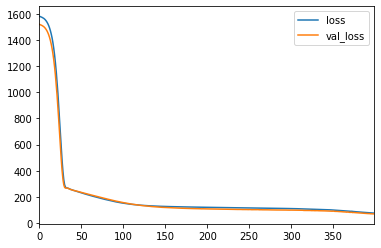

In [326]:
model_losss=pd.DataFrame(model.history.history)
model_losss.plot()
predictions=model.predict(X_test)


In [327]:
print(mean_squared_error(y_test,predictions)**0.5)

8.365382355141545


In [328]:
print(r2_score(y_test,predictions))

0.75562736087125


In [329]:
df1.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [330]:
print(explained_variance_score(y_test,predictions))

0.7567599454626667


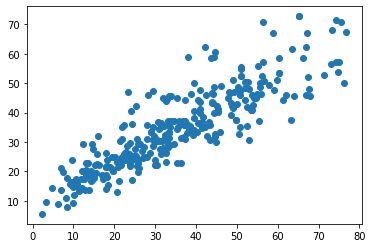

In [331]:

plt.scatter(y_test,predictions)

In [332]:
predictions

array([[32.281124 ],
       [46.82997  ],
       [22.362083 ],
       [37.25094  ],
       [42.177227 ],
       [28.284256 ],
       [20.214497 ],
       [25.07862  ],
       [31.557735 ],
       [33.452843 ],
       [47.550186 ],
       [67.0629   ],
       [36.469463 ],
       [43.260002 ],
       [21.732101 ],
       [29.327915 ],
       [30.485565 ],
       [23.081615 ],
       [13.799953 ],
       [57.05291  ],
       [22.906193 ],
       [23.443527 ],
       [70.75024  ],
       [ 9.456797 ],
       [70.66118  ],
       [45.719532 ],
       [41.523575 ],
       [35.131382 ],
       [40.466446 ],
       [43.57701  ],
       [29.230894 ],
       [34.469    ],
       [36.15084  ],
       [36.94697  ],
       [55.47876  ],
       [40.858154 ],
       [50.500145 ],
       [18.041473 ],
       [18.689796 ],
       [45.605156 ],
       [20.76487  ],
       [17.529793 ],
       [30.895517 ],
       [33.462997 ],
       [53.791035 ],
       [14.195713 ],
       [22.411463 ],
       [14.51

In [333]:
df2=pd.read_csv('C:\\Users\\User\\Downloads\\50_Startups.csv')

In [337]:
df2.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [335]:
df2['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [336]:
dumy=pd.get_dummies(df2['State'],drop_first=True)
df2=df2.drop("State",axis=1)
df2=pd.concat([df2,dumy],axis=1)

In [338]:
X=df2.drop('Profit',axis=1).values
y=df2['Profit'].values

In [339]:
scl=MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train=scl.fit_transform(X_train)
X_test=scl.transform(X_test)

In [361]:
X_train.shape

(35, 5)

In [395]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [421]:
model=Sequential()
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),callbacks=[early_stop],epochs=25,batch_size=256)

Train on 35 samples, validate on 15 samples
Epoch 1/25
35/35 [==============================] - 5s 144ms/sample - loss: 14801378304.0000 - val_loss: 12593238016.0000
Epoch 2/25
35/35 [==============================] - 0s 2ms/sample - loss: 14801370112.0000 - val_loss: 12593234944.0000
Epoch 3/25
35/35 [==============================] - 0s 758us/sample - loss: 14801366016.0000 - val_loss: 12593234944.0000
Epoch 4/25
35/35 [==============================] - 0s 314us/sample - loss: 14801374208.0000 - val_loss: 12593233920.0000
Epoch 5/25
35/35 [==============================] - 0s 386us/sample - loss: 14801375232.0000 - val_loss: 12593232896.0000
Epoch 6/25
35/35 [==============================] - 0s 243us/sample - loss: 14801371136.0000 - val_loss: 12593231872.0000
Epoch 7/25
35/35 [==============================] - 0s 344us/sample - loss: 14801368064.0000 - val_loss: 12593231872.0000
Epoch 8/25
35/35 [==============================] - 0s 428us/sample - loss: 14801360896.0000 - val_loss:

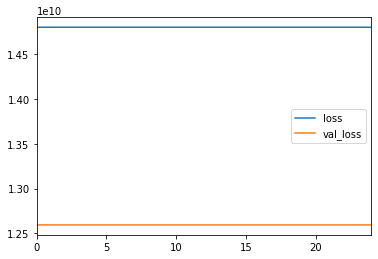

In [422]:
model_losss=pd.DataFrame(model.history.history)
model_losss.plot()
predictions=model.predict(X_test)


In [423]:
y_test

array([ 89949.14, 132602.65, 111313.02,  97427.84, 110352.25, 191792.06,
       105733.54,  49490.75,  71498.49,  42559.73, 126992.93, 108552.04,
       155752.6 ,  64926.08, 124266.9 ])

112219.43232208835


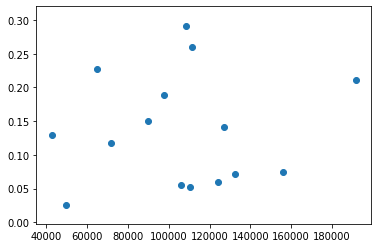

In [424]:
print(mean_squared_error(y_test,predictions)**0.5)
plt.scatter(y_test,predictions)

In [425]:
print(explained_variance_score(y_test,predictions))

3.5692692512689916e-07
